## PRÀCTICA XNDL

Abril Risso I Anna Casanovas

In [65]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [66]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

In [67]:
path_rain_data = "weatherAUS.csv"
rain_data = pd.read_csv(path_rain_data, header=0, delimiter=',')

In [68]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## ANÀLISI EXPLORATÒRIA DE DADES

In [69]:
rain_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [70]:
data = rain_data

In [71]:
print(data.shape)
print(data.columns)

(145460, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


## ANÀLISI UNIVARIANT DE VARIABLE NUMÈRIQUES I CATEGÒRIQUES

### Variables Numèriques

Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Variable: MinTemp
  Mitjana: 12.19
  Desviació Estàndard: 6.40


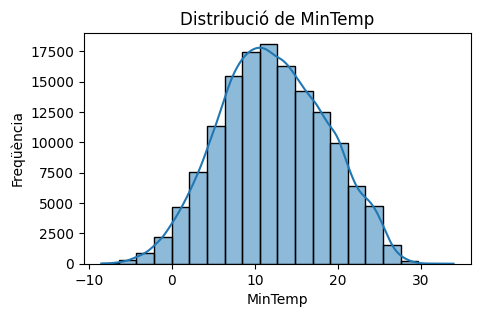

Variable: MaxTemp
  Mitjana: 23.22
  Desviació Estàndard: 7.12


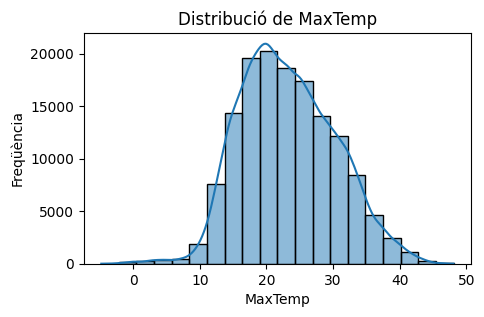

Variable: Rainfall
  Mitjana: 2.36
  Desviació Estàndard: 8.48


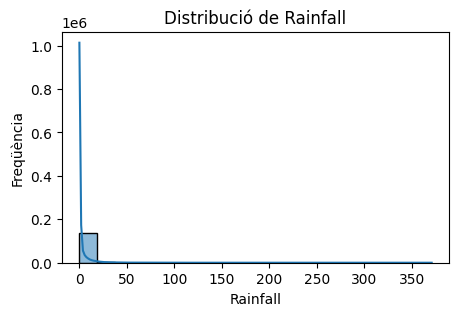

Variable: Evaporation
  Mitjana: 5.47
  Desviació Estàndard: 4.19


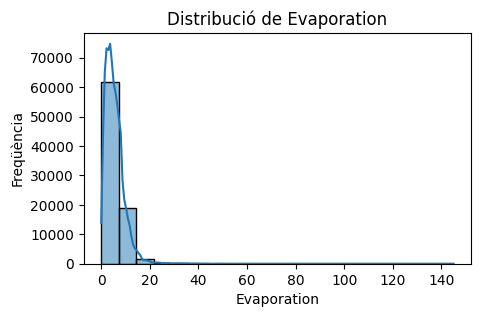

Variable: Sunshine
  Mitjana: 7.61
  Desviació Estàndard: 3.79


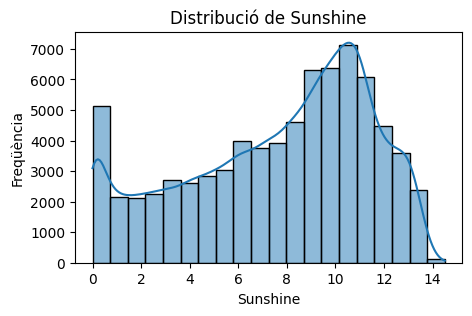

Variable: WindGustSpeed
  Mitjana: 40.04
  Desviació Estàndard: 13.61


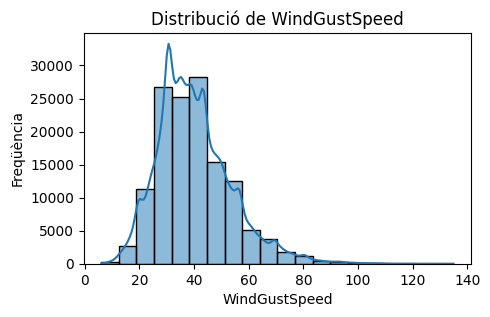

Variable: WindSpeed9am
  Mitjana: 14.04
  Desviació Estàndard: 8.92


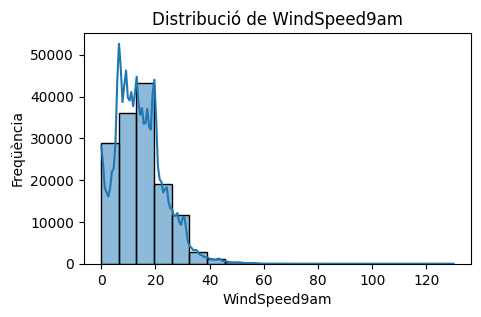

Variable: WindSpeed3pm
  Mitjana: 18.66
  Desviació Estàndard: 8.81


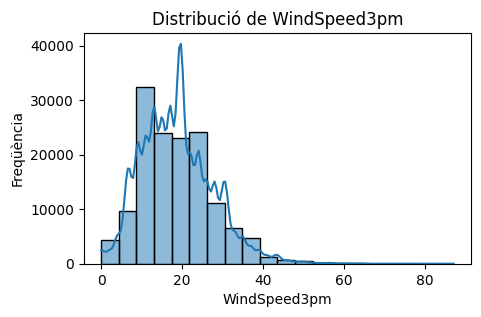

Variable: Humidity9am
  Mitjana: 68.88
  Desviació Estàndard: 19.03


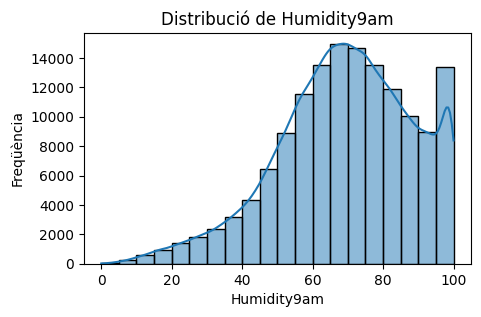

Variable: Humidity3pm
  Mitjana: 51.54
  Desviació Estàndard: 20.80


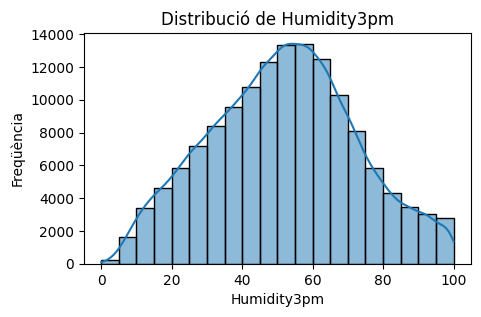

Variable: Pressure9am
  Mitjana: 1017.65
  Desviació Estàndard: 7.11


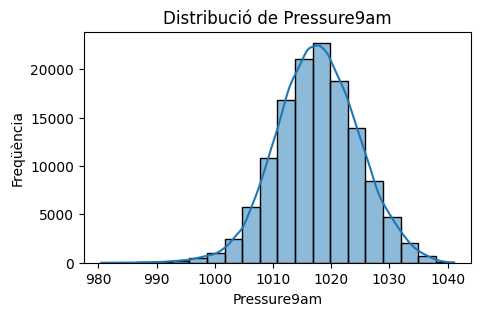

Variable: Pressure3pm
  Mitjana: 1015.26
  Desviació Estàndard: 7.04


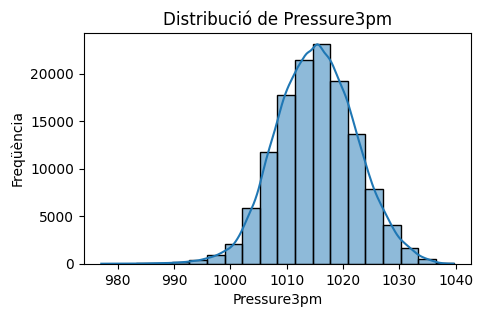

Variable: Cloud9am
  Mitjana: 4.45
  Desviació Estàndard: 2.89


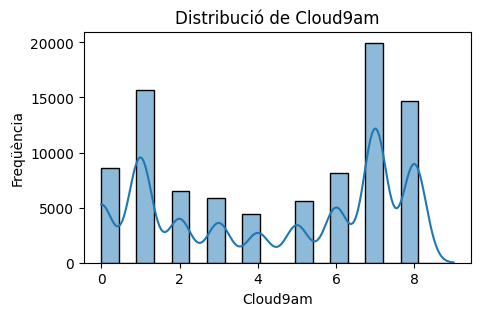

Variable: Cloud3pm
  Mitjana: 4.51
  Desviació Estàndard: 2.72


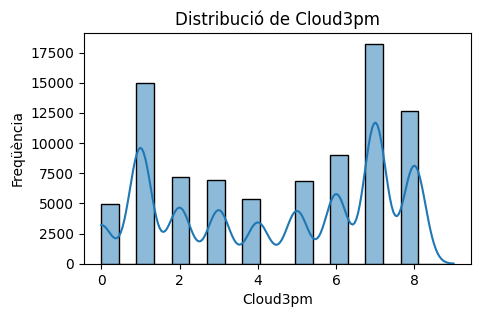

Variable: Temp9am
  Mitjana: 16.99
  Desviació Estàndard: 6.49


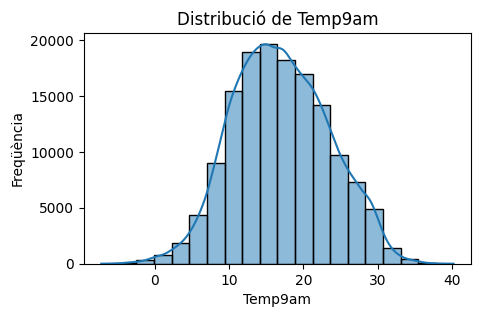

Variable: Temp3pm
  Mitjana: 21.68
  Desviació Estàndard: 6.94


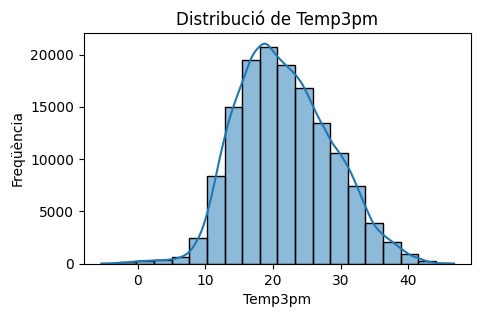

In [72]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

for column in var_num:
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column])

    # Imprimir valores
    print(f"Variable: {column}")
    print(f"  Mitjana: {mitjana:.2f}")
    print(f"  Desviació Estàndard: {desviacio_estandard:.2f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data[column], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

### Variables Categòriques

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


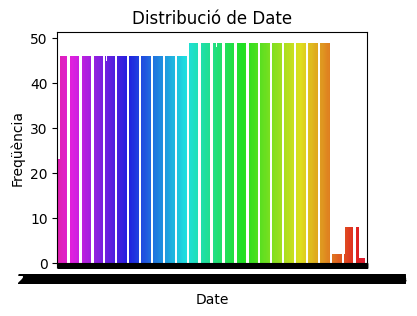

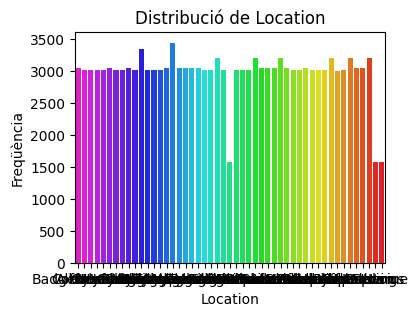

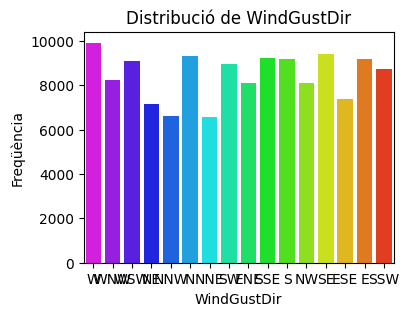

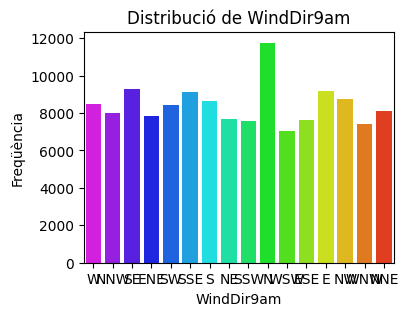

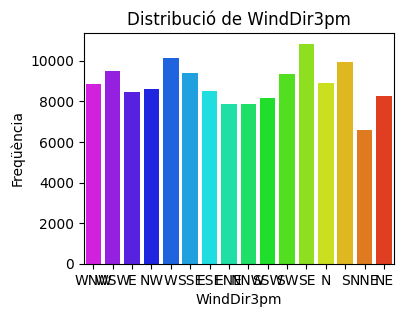

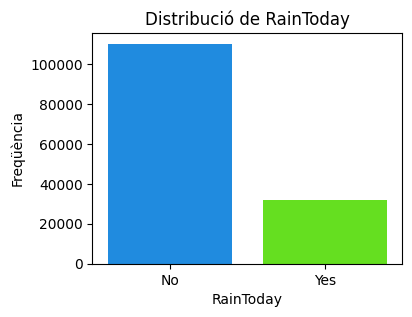

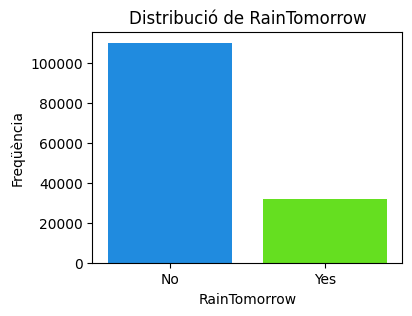

In [73]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

for column in var_cat:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", legend=False)
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

In [74]:
# Observem els valors únics de cada variables i d'aquí veiem quines són les categòriques i quines les numèriques. 

unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
22,RainTomorrow,2
21,RainToday,2
18,Cloud3pm,10
17,Cloud9am,10
10,WindDir3pm,16
9,WindDir9am,16
7,WindGustDir,16
11,WindSpeed9am,43
12,WindSpeed3pm,44
1,Location,49


In [36]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## ANÀLISI BIVARIANT AMB LA VARIABLE OBJECTIU

#### BIVARIATE: Categòriques amb la variable objectiu

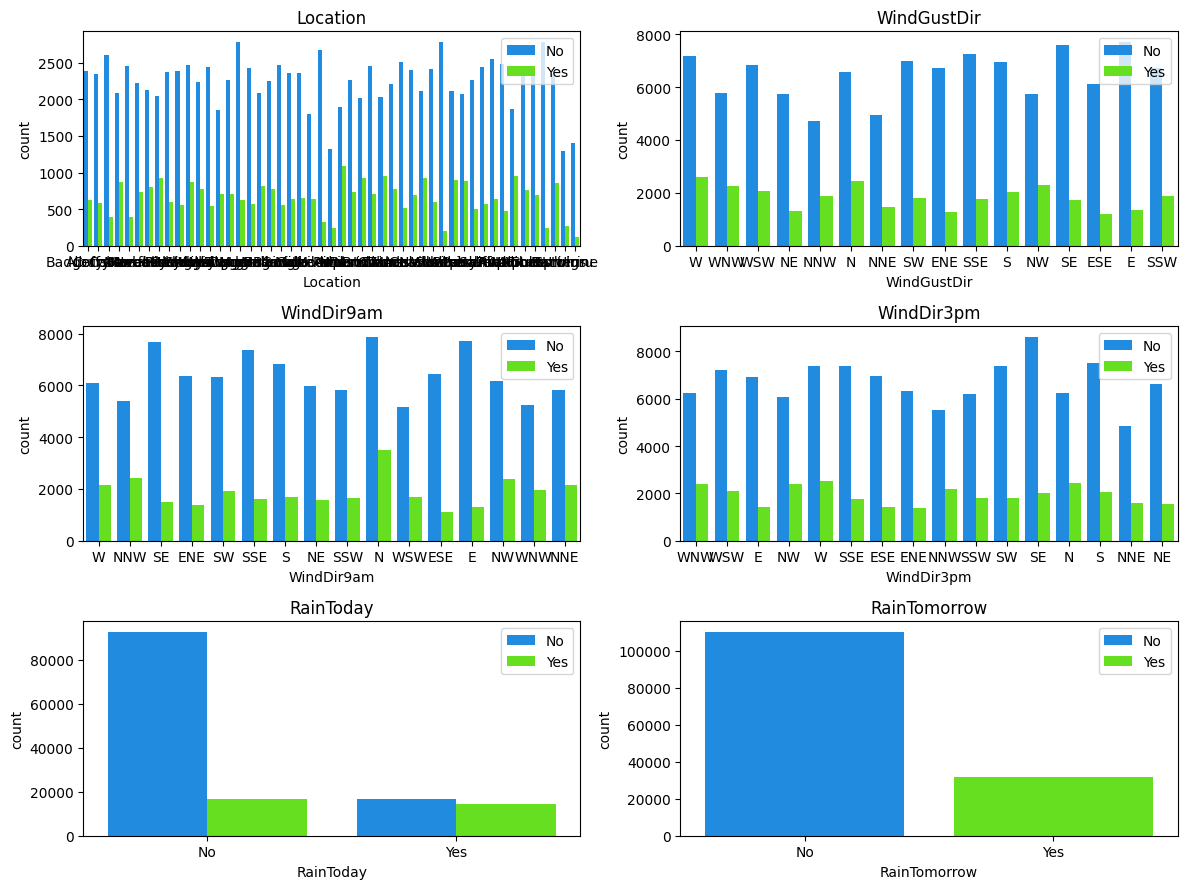

In [75]:
n_cols = 2 
n_rows = (len(var_cat[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)  
axes = axes.flatten()  

for idx, variable in enumerate(var_cat[1:]):
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].legend(loc='upper right')
    axes[idx].set_title(variable)

for ax in axes[len(var_cat[1:]):]:
    ax.set_visible(False) 

plt.tight_layout()
plt.show()

#### BIVARIATE: numèriques amb la variable objectiu

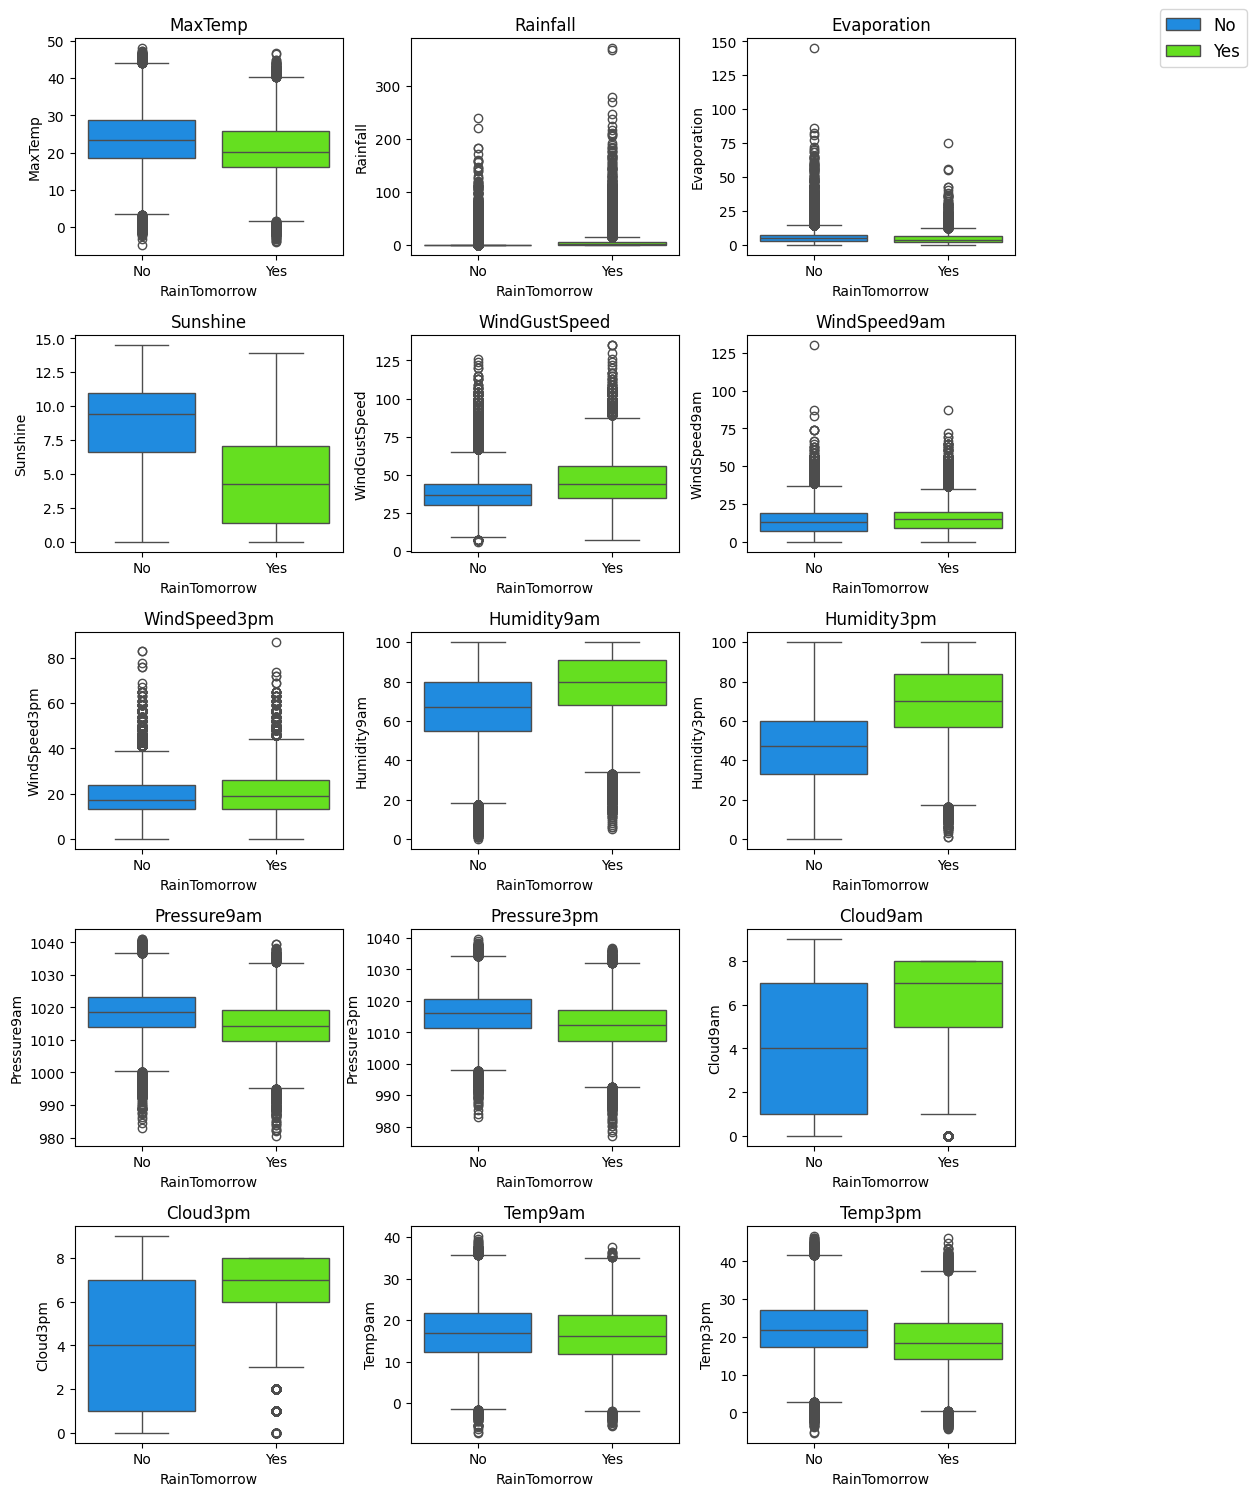

In [79]:
n_cols = 3
n_rows = (len(var_num[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3), dpi=100)
axes = axes.flatten() 

for idx, variable in enumerate(var_num[1:]):
    sns.boxplot(data=data, x='RainTomorrow', hue='RainTomorrow', y=variable, palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].set_title(f'{variable}')
    axes[idx].set_xlabel('RainTomorrow')
    axes[idx].set_ylabel(variable)
    axes[idx].legend().remove()

for ax in axes[len(var_num[1:]):]:
    ax.set_visible(False)  

handles, labels = axes[0].get_legend_handles_labels()  
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(right=0.85) 
plt.show()

MATRIU DE CORRELACIÓ

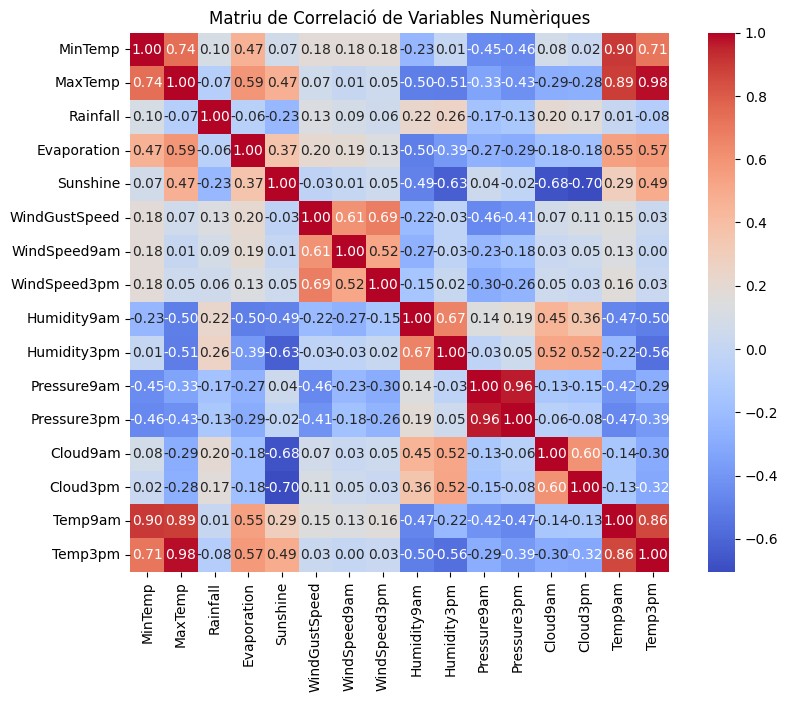

In [9]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

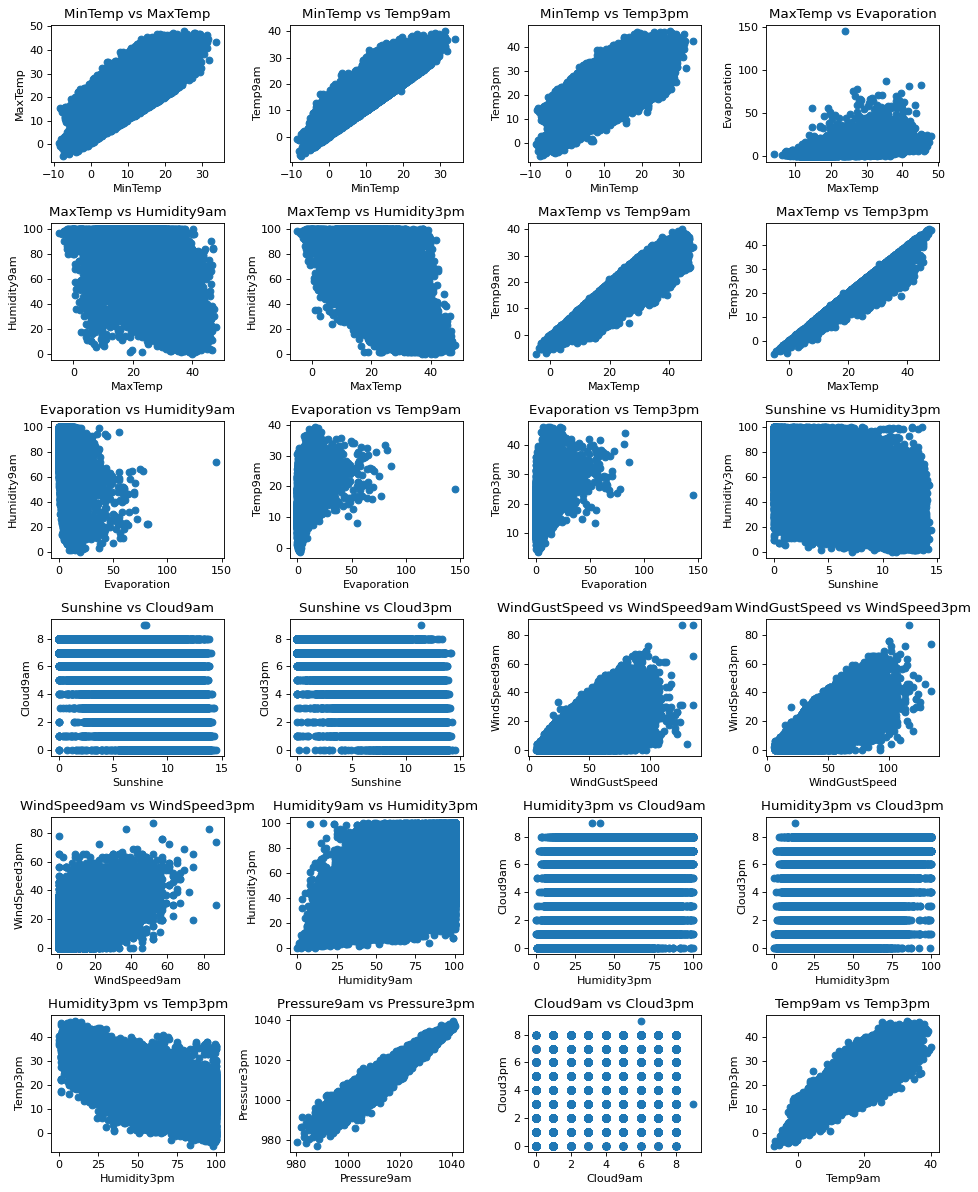

In [80]:
corr_matrix = data[var_num].corr().abs()

# Selecciona las parejas de variables con una correlación mayor a 0.5
umbral_correlacion = 0.5
parejas_alta_corr = np.where((np.triu(corr_matrix.values, k=1) < -umbral_correlacion) | (np.triu(corr_matrix.values, k=1) > umbral_correlacion))

indices_fila = parejas_alta_corr[0]
indices_columna = parejas_alta_corr[1]

num_graficos = len(indices_fila)
n_cols = 4  
n_rows = (num_graficos + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2.5 * n_rows), dpi=80) 
axes = axes.flatten() 

for idx, (fila, columna) in enumerate(zip(indices_fila, indices_columna)):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]

    axes[idx].scatter(data[variable_x], data[variable_y])
    axes[idx].set_title(f'{variable_x} vs {variable_y}')
    axes[idx].set_xlabel(variable_x)
    axes[idx].set_ylabel(variable_y)

for ax in axes[num_graficos:]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

### RECODIFICACIÓ DE VARIABLES CATEGÒRIQUES

In [81]:
sum(data['Date'].isna())

0

In [82]:
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


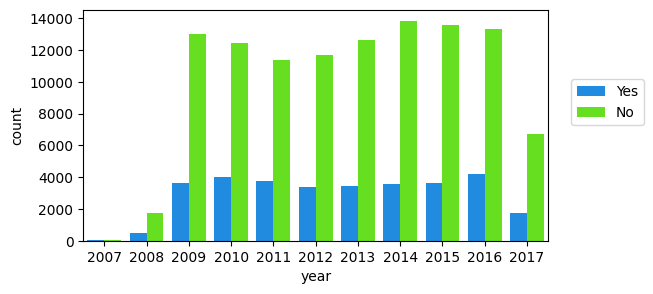

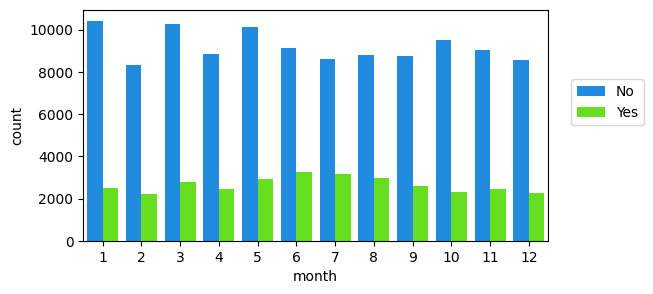

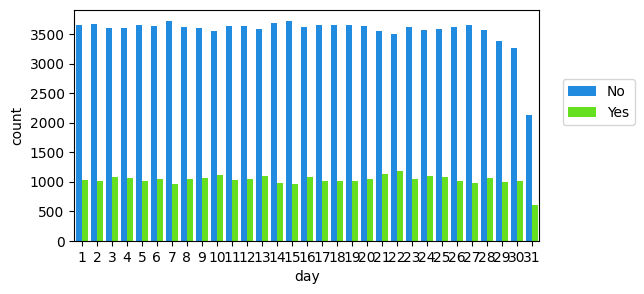

In [83]:
variables_temporals = ['year', 'month', 'day']
for variable in variables_temporals:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

Veiem que no hi ha canvis significatius en la variable objectiu per les temporals així que les eliminem

In [84]:
data = data.drop(columns=['Date'])
#data = data.drop(columns=['day'])
#data = data.drop(columns=['month'])
#data = data.drop(columns=['year'])

IDENTIFICACIÓ I TRACTAMENT D'OUTLIERS

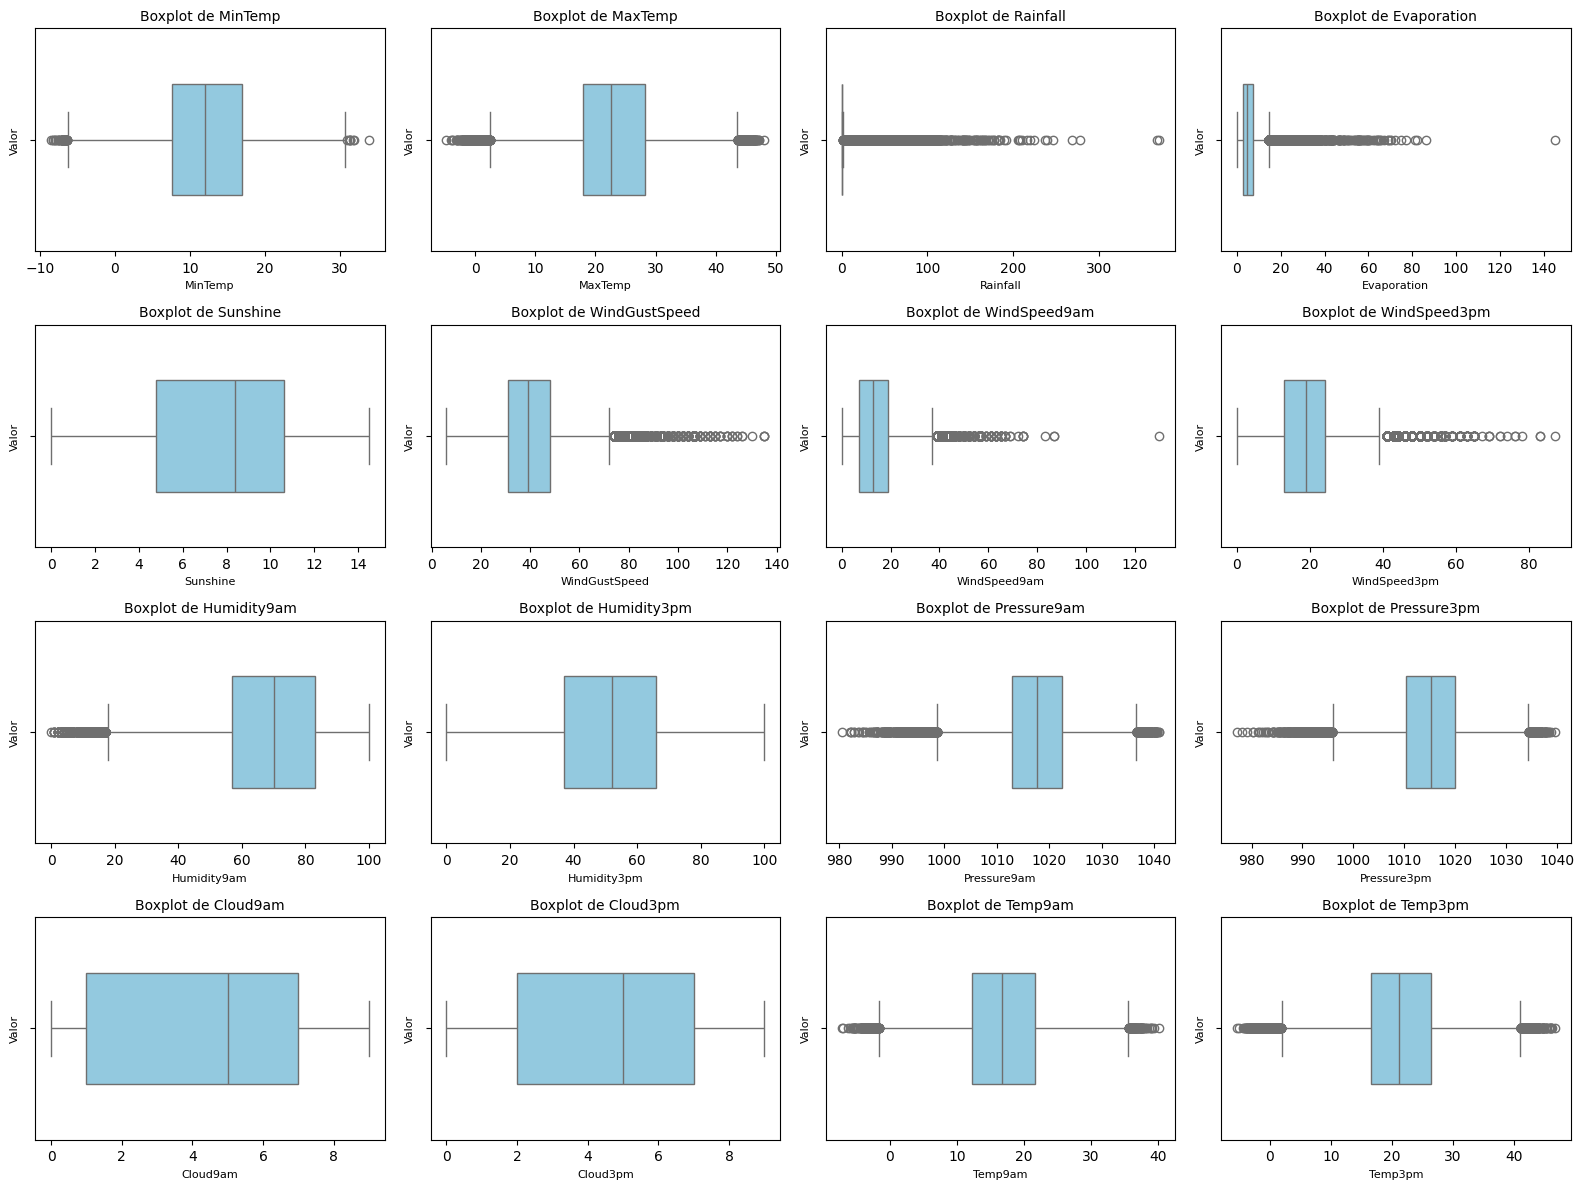

In [85]:
n_cols = 4 
n_rows = (len(var_num) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  
axes = axes.flatten()  

for idx, columna in enumerate(var_num):
    sns.boxplot(x=data[columna], color='skyblue', width=0.5, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {columna}', fontsize=10)
    axes[idx].set_xlabel(columna, fontsize=8)
    axes[idx].set_ylabel('Valor', fontsize=8)

for ax in axes[len(var_num):]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

Veiem que tot i que hi ha valors extrems que poden considerar-se outliers, en tots els casos són mesures correctes que hem considerat necessàries pel model. Per tant, no eliminem cap outlier. 

IDENTIFICACIÓ I TRACTAMENT DE MISSING VALUES

In [86]:
# VISUALITZACIÓ DE MISSING VALUES

def data_explore(dataframe): # Per mirar més o menys quines variables tenen més missing values
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [87]:
data_explore(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (145460, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    14

Borrem les files que tenen missing data a RainTomorrow perquè llavors no podrem predir-la si no sabem el seu valor real. 

In [88]:
data = data.dropna(subset=['RainTomorrow'])

Borrem les files que tenen missing data d'aquelles variables que tinguin un alt percentatge de missing data

In [90]:
#eliminar files que tenen missings de les variables sunshine i evaporation
data = data.dropna(subset=['Sunshine', 'Evaporation'])

In [92]:
data_explore(data)
data.shape

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (70418, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70418 entries, 6049 to 142302
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       70418 non-null  object 
 1   MinTemp        70346 non-null  float64
 2   MaxTemp        70388 non-null  float64
 3   Rainfall       70200 non-null  float64
 4   Evaporation    70418 non-null  float64
 5   Sunshine       70418 non-null  float64
 6   WindGustDir    66192 non-null  object 
 7   WindGustSpeed  66215 non-null  float64
 8   WindDir9am     67888 non-null  object 
 9   WindDir3pm     69773 non-null  object 
 10  WindSpeed9am   70269 non-null  float64
 11  WindSpeed3pm   70057 non-null  float64
 12  Humidity9am    70050 non-null  float64
 13  Humidity3pm    69876 non-null  

(70418, 25)

Es probaran diferents tècniques d'imputació per veure quina és més eficaç

In [93]:
# IMPUTACIÓ AMB LA MITJANA

def imputacio_mitjana(data1): # Assumint que tot són variables numèriques
    data = data1.copy()
    
    column_means = data.mean()
    data.fillna(column_means, inplace=True)
    
    return data

In [94]:
#IMPUTACIÓ PER KNN
from sklearn.impute import KNNImputer

# Fa falta haver codificat les variables categòriques
def imputacio_knn(train_data, test_data):
    train_data_copy = train_data.copy()
    test_data_copy = test_data.copy()

    imputer_num = KNNImputer(n_neighbors=5)

    return imputer_num.fit_transform(train_data_copy), imputer_num.transform(test_data_copy)

In [95]:
from statsmodels.imputation.mice import MICE

# No fa falta fer onehotencoding abans si se li proporciona les variables numeriques i les categoriques
def imputacio_mice(data1, cat_vars, num_vars):
    data = data1.copy()

    imputer_mice = MICE(data, cat_vars=cat_vars, num_vars=num_vars, missing_values=np.nan,
                        sample_posterior=True, max_iter=50, random_state=42)
    data_imputada = imputer_mice.fit_transform()

    return data_imputada

In [96]:
def imputacio_moda(data1):
    data = data1.copy()

    for column in data.columns:
        moda = data[column].mode()[0]
        data[column] = data[column].fillna(moda)

    return data

BALANCEIG DE LES DADES

A l'anàlisi univariant i bivariant ja hem vist que la nostra variable a predir està molt balancejada

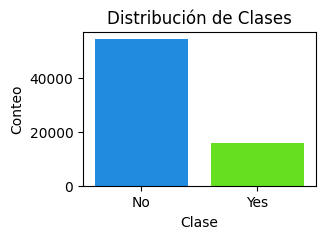

In [97]:
data['RainTomorrow'].value_counts()

plt.figure(figsize=(3, 2))
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=data, palette="gist_rainbow_r")
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

Probarem a fer undersampling i oversampling. Ens podem permetre fer undersampling ja que tenim una gran quantitat de dades. 

In [23]:
%pip install imbalanced-learn scikit-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
from imblearn.under_sampling import RandomUnderSampler

def undersampling(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res

In [99]:
from imblearn.over_sampling import RandomOverSampler

def random_oversampling(X, y):
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    return X_res, y_res

In [100]:
from imblearn.over_sampling import SMOTE

def smote_oversampling(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

#### ANÀLISI DE REDUNDÀNCIA

In [101]:
from scipy.stats import chi2_contingency

categoriques =  data.select_dtypes(include=['category', 'object']).columns.tolist()
for var in categoriques:

    contingency_table = pd.crosstab(data[var], data['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}")

Chi-square test for Location: chi2 = 1919.2774112533855, p-value = 0.0
Chi-square test for WindGustDir: chi2 = 964.2873514093989, p-value = 6.054227710489327e-196
Chi-square test for WindDir9am: chi2 = 1305.3286553566984, p-value = 3.794682947126163e-269
Chi-square test for WindDir3pm: chi2 = 930.789867580708, p-value = 9.043807551891038e-189
Chi-square test for RainToday: chi2 = 6684.501066927321, p-value = 0.0
Chi-square test for RainTomorrow: chi2 = 70412.27889967136, p-value = 0.0


## MODEL LINEAL

Com a model lineal es fa una regressió logística ja que la nostra variable objectiu és binària.

In [102]:
def particio_dades(data):
    X = data.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return  X_train, X_test, y_train, y_test

In [103]:
def recodificacio_one_hot(X_train, X_test, categoriques, numeriques):

    #Aquí igual eliminar variable del localització??
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])
    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)
    return X_train_combined, X_test_combined

In [104]:
def normalitzacio_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_combined = scaler.fit_transform(X_train)
    X_test_combined = scaler.transform(X_test)
    return X_train_combined, X_test_combined

In [105]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

def entrenament(data):
    X_train, X_test, y_train, y_test = particio_dades(data)

    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
    
    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)
    
    X_train_norm, X_test_norm = normalitzacio_standard(X_train_encoded, X_test_encoded)

    X_train_imputed, X_test_imputed = imputacio_knn(X_train_norm, X_test_norm)

    # Aquí li podem posar el oversampling que volguem
    X_train_resampled, y_train_resampled = smote_oversampling(X_train_imputed, y_train)

    log_reg = LogisticRegression()
    log_reg.fit(X_train_resampled, y_train_resampled)

    y_pred = log_reg.predict(X_test_imputed)

    encoder = LabelEncoder()
    encoder.fit(y_test)

    # Transformar las etiquetas verdaderas y predichas
    y_true_encoded = encoder.transform(y_test)
    y_pred_encoded = encoder.transform(y_pred)

    #Mètriques
    precision = precision_score(y_true_encoded, y_pred_encoded, average='binary')
    recall = recall_score(y_true_encoded, y_pred_encoded, average='binary')
    f1 = f1_score(y_true_encoded, y_pred_encoded, average='binary')
    accuracy = accuracy_score(y_true_encoded, y_pred_encoded)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Accuracy:", accuracy)

In [106]:
entrenament(data)

Precision: 0.5469833308747603
Recall: 0.7869269949066214
F1-Score: 0.6453746410234096
Accuracy: 0.8071097226166809


In [19]:
#ENTRENAMENT DEL MODEL
def entrenament(data1):
    X = data1.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data1['RainTomorrow']

    numeriques = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X.select_dtypes(include=['category', 'object']).columns.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    '''RECODIFICACIO DE VARIABLES CATEGÒRIQUES'''
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])

    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)

    '''NORMALITZACIÓ DE LES VARIABLES'''
    scaler = StandardScaler()
    X_train_combined = scaler.fit_transform(X_train_combined)
    X_test_combined = scaler.transform(X_test_combined)

    X_train_imputed = imputacio_knn(X_train_combined)
    X_test_imputed = imputacio_knn(X_test_combined)

    X_train_resampled, y_train_resampled = oversampling(X_train_imputed, y_train)

    log_reg = LogisticRegression()

    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train_resampled, y_train_resampled)

    best_params = grid_search.best_params_
    print("Los mejores hiperparámetros encontrados son:", best_params)

    # Ajustar el modelo a los datos de entrenamiento
    log_reg.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = log_reg.predict(X_test_imputed)

    # Calcular la precisión del modelo
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Precisión del modelo:", accuracy)

    f1_score = metrics.f1_score(y_test, y_pred)
    print("F1 Score del modelo:", f1_score)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusión:")
    print(conf_matrix)

    return log_reg

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión logística
log_reg = LogisticRegression()

param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Los mejores hiperparámetros encontrados son:", best_params)

# Ajustar el modelo a los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score del modelo:", f1_score)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

TypeError: '<' not supported between instances of 'float' and 'str'

# PERCEPTRÓ MULTICAPA

In [21]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers.legacy import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [22]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [25]:

# Load dataset
X = data.copy()
X = X.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

categoriques = X.select_dtypes(include=['category', 'object']).columns.tolist()
X = X.select_dtypes(exclude=['category', 'object'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Standardize features with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(2, activation='softmax')
])

# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 1000
batch_size = 16
history = model.fit(X_train_scaled, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot leaning curves
plot_curves(history)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).